In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


1. Считать в `pandas.DataFrame` любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.
   > Возможно, потребуется использовать два датасета: один для бинарной классификации, второй для многоклассовой.

Датасет содержит ~100 000 записей, 12 признаков: возраст, доход, количество открытых счетов и т.д. <br/>
Целевая переменная – Credit_Score с тремя уровнями (Poor, Standard, Good).<br/>
Для бинарной классификации метка target сформирована: 1 = Poor, 0 = Standard или Good

In [2]:
df = pd.read_csv('../dataset/Score.csv')

2. Бинарная классификация:

In [3]:
# 1. Привести описание датасета.
df.info()
print(df['Credit_Score'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99960 entries, 0 to 99959
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Delay_from_due_date       99960 non-null  float64
 1   Num_of_Delayed_Payment    99960 non-null  float64
 2   Num_Credit_Inquiries      99960 non-null  float64
 3   Credit_Utilization_Ratio  99960 non-null  float64
 4   Credit_History_Age        99960 non-null  float64
 5   Payment_of_Min_Amount     99960 non-null  object 
 6   Amount_invested_monthly   99960 non-null  float64
 7   Monthly_Balance           99960 non-null  float64
 8   Credit_Score              99960 non-null  object 
 9   Credit_Mix                99960 non-null  object 
 10  Payment_Behaviour         99960 non-null  object 
 11  Age                       99960 non-null  float64
 12  Annual_Income             99960 non-null  float64
 13  Num_Bank_Accounts         99960 non-null  float64
 14  Num_Cr

In [4]:
df.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3.0,7.0,4.0,26.822620,265.0,No,80.415295,312.494089,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
1,3.0,7.0,4.0,31.944960,265.0,No,118.280222,284.629162,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
2,3.0,7.0,4.0,28.609352,267.0,No,81.699521,331.209863,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
3,5.0,4.0,4.0,31.377862,268.0,No,199.458074,223.451310,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
4,6.0,4.0,4.0,24.797347,269.0,No,41.420153,341.489231,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949


In [5]:
df.describe()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
count,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000
mean,21.095718,13.336345,5.774570,32.284544,221.122819,193.665219,403.445100,33.269228,50498.704153,5.368868,5.532853,14.535174,3.533974,4196.814288,10.396953,1426.514966,105.565802
std,14.827414,6.269964,3.862224,5.116888,99.696084,194.782737,214.387092,10.762371,38294.243161,2.591668,2.067698,8.741047,2.446156,3186.518163,6.510846,1155.252504,125.820983
min,0.000000,0.000000,0.000000,20.000000,1.000000,0.000000,0.007760,14.000000,7005.930000,0.000000,0.000000,1.000000,0.000000,303.645417,0.500000,0.230000,0.000000
25%,10.000000,9.000000,3.000000,28.052051,144.000000,73.708522,270.317007,24.000000,19338.480000,3.000000,4.000000,7.000000,2.000000,1626.594167,5.500000,566.080000,29.054273
50%,18.000000,14.000000,5.000000,32.305470,219.000000,129.342067,337.237873,33.000000,36996.830000,5.000000,5.000000,13.000000,3.000000,3091.386667,9.340000,1166.470000,66.058063
75%,28.000000,18.000000,8.000000,36.496305,302.000000,234.323706,471.904834,42.000000,71681.400000,7.000000,7.000000,20.000000,5.000000,5957.715000,14.680000,1948.200000,145.584994
max,67.000000,28.000000,29.000000,50.000000,404.000000,1977.326102,1602.040519,56.000000,179987.280000,10.000000,11.000000,34.000000,9.000000,15204.633333,29.980000,4998.070000,1779.103254


In [6]:
# Осуществить предобработку данных (избавиться от `null`, убрать некоторые признаки и т.п.) - "подчистить данные".
df['target'] = df['Credit_Score'].apply(lambda x: 0 if x == 'Poor' else 1)
df = df.dropna()

In [7]:
# Закодировать категориальные признаки при необходимости.
categorical_cols = df.select_dtypes(include=['object']).columns.drop('Credit_Score')
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [8]:
# Выбрать какое-нибудь значение гиперпараметра $k$ алгоритма $kNN$.
k = 5

In [9]:
# Разбить выборку на обучающую и тестовую.
X = df_encoded.drop(columns=['Credit_Score', 'target'])
y = df_encoded['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [10]:
# Осуществить бинарную классификацию.
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [11]:
# Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
print("=== Без нормализации ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

=== Без нормализации ===
Accuracy: 0.8587434973989596
Precision: 0.7564397424103035
Recall: 0.7564397424103035
F1-Score: 0.7564397424103035
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     21292
           1       0.76      0.76      0.76      8696

    accuracy                           0.86     29988
   macro avg       0.83      0.83      0.83     29988
weighted avg       0.86      0.86      0.86     29988



In [12]:
# Нормализовать данные (`StandardScaler`или `MinMaxScaler`).
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_s, X_test_s, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


In [13]:
# Осуществить бинарную классификацию.
knn.fit(X_train_s, y_train)
y_pred_scaled = knn.predict(X_test_s)

In [14]:
# Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
print("=== С нормализацией ===")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Precision:", precision_score(y_test, y_pred_scaled))
print("Recall:", recall_score(y_test, y_pred_scaled))
print("F1-Score:", f1_score(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))

=== С нормализацией ===
Accuracy: 0.8510070694944645
Precision: 0.7591956841589014
Recall: 0.7120515179392825
F1-Score: 0.7348682648943745
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     21292
           1       0.76      0.71      0.73      8696

    accuracy                           0.85     29988
   macro avg       0.82      0.81      0.82     29988
weighted avg       0.85      0.85      0.85     29988



**Вывод:** После нормализации точность немного снижается, а recall падает сильнее, чем precision. То есть модель хуже распознаёт класс 1, пропуская их чаще.<br/>
Видимо, для выбранного значения k и структуры признаков масштабирование данных не дало улучшения.

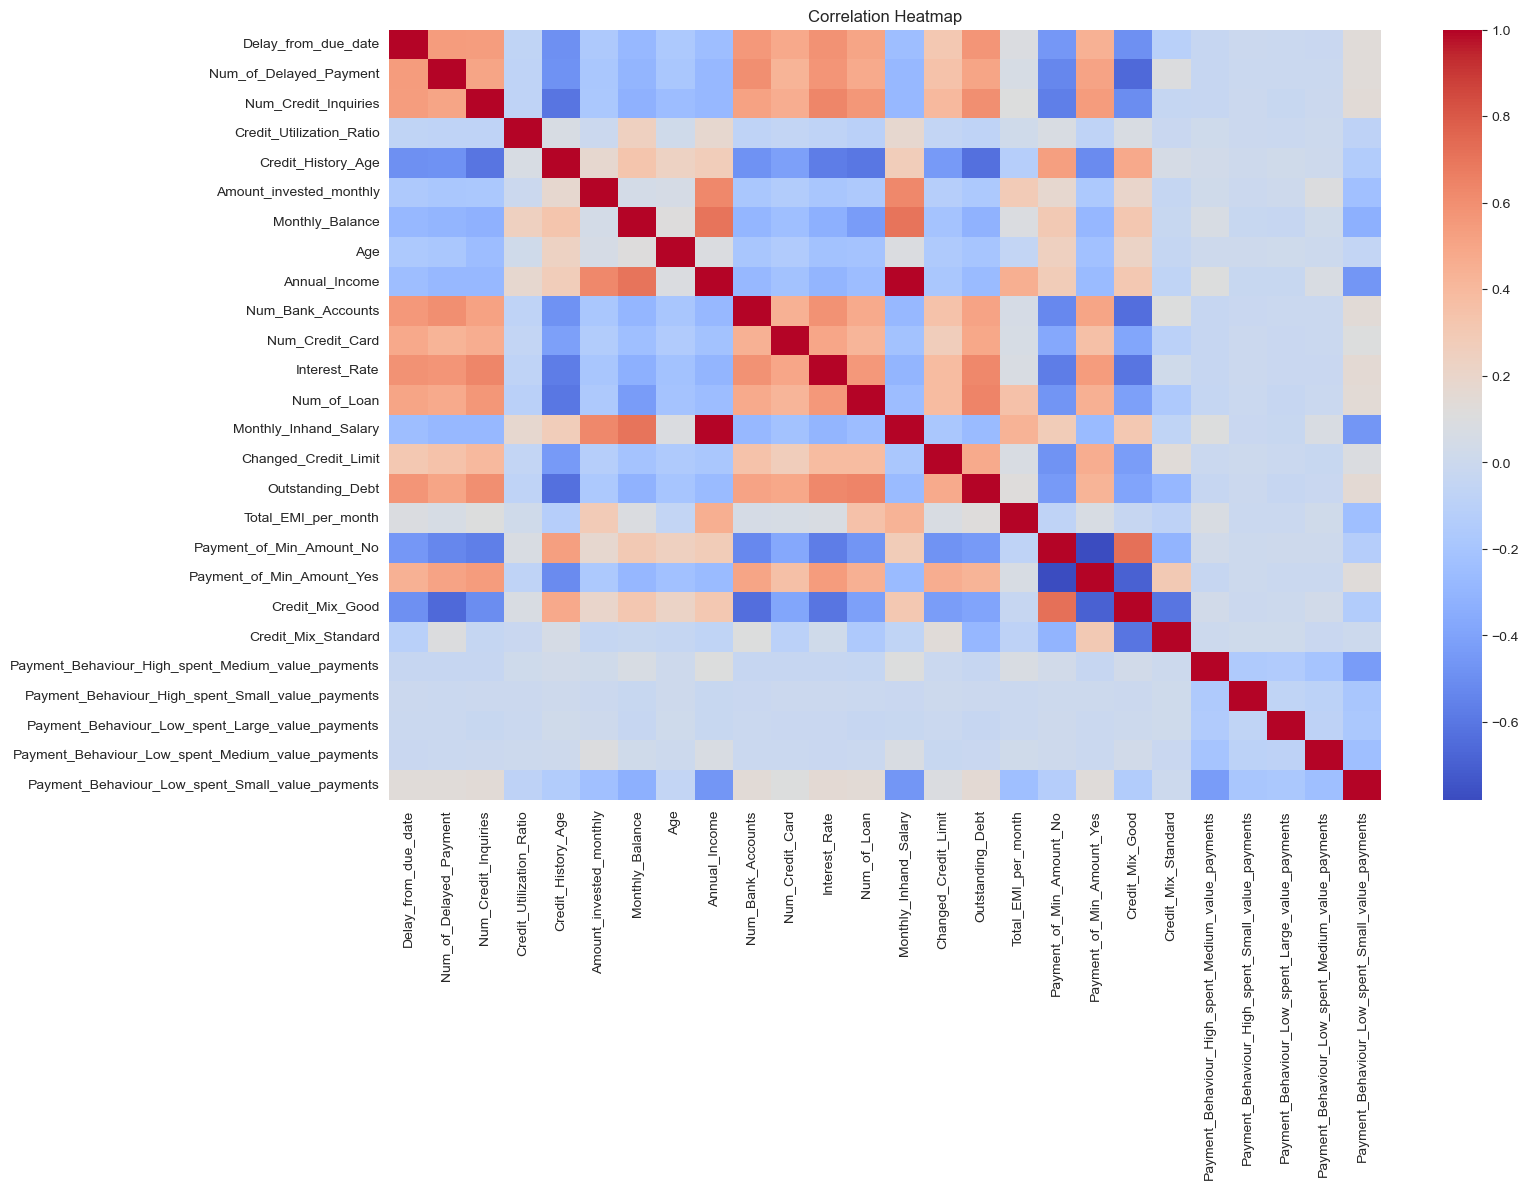

In [15]:
# Построить `сorrelation heatmap` и/или воспользоваться методом `corr()`.
df_corr = pd.DataFrame(X_scaled, columns=X.columns).corr()
plt.figure(figsize=(16, 10))
sns.heatmap(df_corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
# Выбрать наиболее важные признаки эвристически или на основании каких-нибудь вычислений.
np.fill_diagonal(df_corr.values, 0)
threshold_corr = 0.65
correlated = (df_corr.abs() > threshold_corr)
feature_importance = correlated.sum(axis=1)
important_features = feature_importance[feature_importance > 0].index.tolist()
important_features

['Num_of_Delayed_Payment',
 'Monthly_Balance',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Payment_of_Min_Amount_No',
 'Payment_of_Min_Amount_Yes',
 'Credit_Mix_Good']

In [17]:
X_filtered = pd.DataFrame(X_scaled, columns=X.columns)[important_features]
X_filtered

,Num_of_Delayed_Payment,Monthly_Balance,Annual_Income,Monthly_Inhand_Salary,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Mix_Good
0,-1.010592,-0.424239,-0.819568,-0.744381,1.343748,-1.048094,1.514097
1,-1.010592,-0.554215,-0.819568,-0.744381,1.343748,-1.048094,1.514097
2,-1.010592,-0.336940,-0.819568,-0.744381,1.343748,-1.048094,1.514097
3,-1.489066,-0.839578,-0.819568,-0.744381,1.343748,-1.048094,1.514097
4,-1.489066,-0.288992,-0.819568,-0.744381,1.343748,-1.048094,1.514097
...,...,...,...,...,...,...,...
99955,-1.010592,0.356465,-0.283849,-0.262796,1.343748,-1.048094,1.514097
99956,-1.010592,0.434760,-0.283849,-0.262796,1.343748,-1.048094,1.514097
99957,-1.170084,0.528784,-0.283849,-0.262796,1.343748,-1.048094,1.514097
99958,-1.170084,-0.393123,-0.283849,-0.262796,1.343748,-1.048094,1.514097


In [18]:
# Осуществить бинарную классификацию с отфильтрованными признаками.
X_train_f, X_test_f, y_train, y_test = train_test_split(X_filtered, y, test_size=0.3, random_state=42, stratify=y)
knn.fit(X_train_f, y_train)
y_pred_filtered = knn.predict(X_test_f)

In [19]:
# Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
print("=== С фильтрацией признаков ===")
print("Accuracy:", accuracy_score(y_test, y_pred_filtered))
print("Precision:", precision_score(y_test, y_pred_filtered))
print("Recall:", recall_score(y_test, y_pred_filtered))
print("F1-Score:", f1_score(y_test, y_pred_filtered))
print(classification_report(y_test, y_pred_filtered))

=== С фильтрацией признаков ===
Accuracy: 0.7153528077897826
Precision: 0.5112107623318386
Recall: 0.41950321987120515
F1-Score: 0.4608388074785245
              precision    recall  f1-score   support

           0       0.78      0.84      0.81     21292
           1       0.51      0.42      0.46      8696

    accuracy                           0.72     29988
   macro avg       0.65      0.63      0.63     29988
weighted avg       0.70      0.72      0.71     29988



**Вывод:** Удаление признаков на основе корреляционной фильтрации сильно ухудшило метрики. <br/>
Качество классификации резко упало.<br/>
Recall по классу 1 просел почти до 0.42.<br/>
Скорее всего, были удалены важные признаки, которые критичны для определения проблемных клиентов.

In [23]:
# Перебрать значения гиперпараметра $k$ в каком-нибудь диапазоне с использованием кросс-валидации на данных  с отфильтрованными признаками.
k_range = range(1, 25)
train_scores  = []
test_scores  = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_results = cross_validate(
        knn,
        X_filtered,
        y,
        cv=5,
        scoring='accuracy',
        return_train_score=True,
        n_jobs=-1
    )
    train_scores.append(np.mean(cv_results['train_score']))
    test_scores.append(np.mean(cv_results['test_score']))


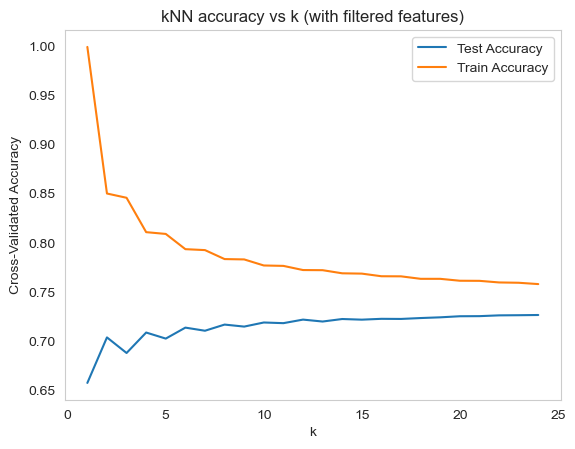

In [24]:
# Построить график *train/test accuracy* в зависимости от значения $k$.
plt.plot(k_range, test_scores, label="Test Accuracy")
plt.plot(k_range, train_scores, label="Train Accuracy")
plt.xlabel("k")
plt.ylabel("Cross-Validated Accuracy")
plt.title("kNN accuracy vs k (with filtered features)")
plt.legend()
plt.grid()
plt.show()

**Общий вывод**

Лучшие метрики достигаются без нормализации и до фильтрации. Это указывает на то, что:

 - kNN чувствителен к структуре признаков и масштабу.

 - Нормализация и отбор признаков не всегда улучшают результат — необходимо подбирать параметры и методы фильтрации аккуратно.

## 3. Многоклассовая классификация

In [25]:
df = pd.read_csv("../dataset/Score.csv")

In [26]:
# Привести описание датасета.
print(df.head())
print(df.info())
print(df['Credit_Score'].value_counts())

   Delay_from_due_date  Num_of_Delayed_Payment  Num_Credit_Inquiries  \
0                  3.0                     7.0                   4.0   
1                  3.0                     7.0                   4.0   
2                  3.0                     7.0                   4.0   
3                  5.0                     4.0                   4.0   
4                  6.0                     4.0                   4.0   

   Credit_Utilization_Ratio  Credit_History_Age Payment_of_Min_Amount  \
0                 26.822620               265.0                    No   
1                 31.944960               265.0                    No   
2                 28.609352               267.0                    No   
3                 31.377862               268.0                    No   
4                 24.797347               269.0                    No   

   Amount_invested_monthly  Monthly_Balance Credit_Score Credit_Mix  ...  \
0                80.415295       312.494089         

In [27]:
# Осуществить предобработку данных - "подчистить данные".
df = df.dropna()

In [28]:
# Закодировать категориальные признаки при необходимости.
for col in df.select_dtypes(include="object").columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [29]:
# Нормализовать данные.
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df.drop("Credit_Score", axis=1)), columns=df.columns.drop("Credit_Score"))
y = df["Credit_Score"]

In [30]:
# Выбрать какое-нибудь значение гиперпараметра $k$ алгоритма $kNN$.
k = 5

In [31]:
# Разбить выборку на обучающую и тестовую.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

In [32]:
# Осуществить многоклассовую классификацию.
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [33]:
# Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
print("=== С фильтрацией признаков ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))
print("Recall:", recall_score(y_test, y_pred, average="weighted"))
print("F1-Score:", f1_score(y_test, y_pred, average="weighted"))
print(classification_report(y_test, y_pred, output_dict=True))

=== С фильтрацией признаков ===
Accuracy: 0.7461984793917567
Precision: 0.7480744493614723
Recall: 0.7461984793917567
F1-Score: 0.7468990483106678
{'0': {'precision': 0.6495400104148585, 'recall': 0.6998316813166261, 'f1-score': 0.6737486496218942, 'support': 5347.0}, '1': {'precision': 0.7395605659726217, 'recall': 0.7393054277828887, 'f1-score': 0.7394329748691701, 'support': 8696.0}, '2': {'precision': 0.7857602677996652, 'recall': 0.7655064283474443, 'f1-score': 0.7755011277359509, 'support': 15945.0}, 'accuracy': 0.7461984793917567, 'macro avg': {'precision': 0.7249536147290484, 'recall': 0.7348811791489864, 'f1-score': 0.7295609174090051, 'support': 29988.0}, 'weighted avg': {'precision': 0.7480744493614723, 'recall': 0.7461984793917567, 'f1-score': 0.7468990483106678, 'support': 29988.0}}


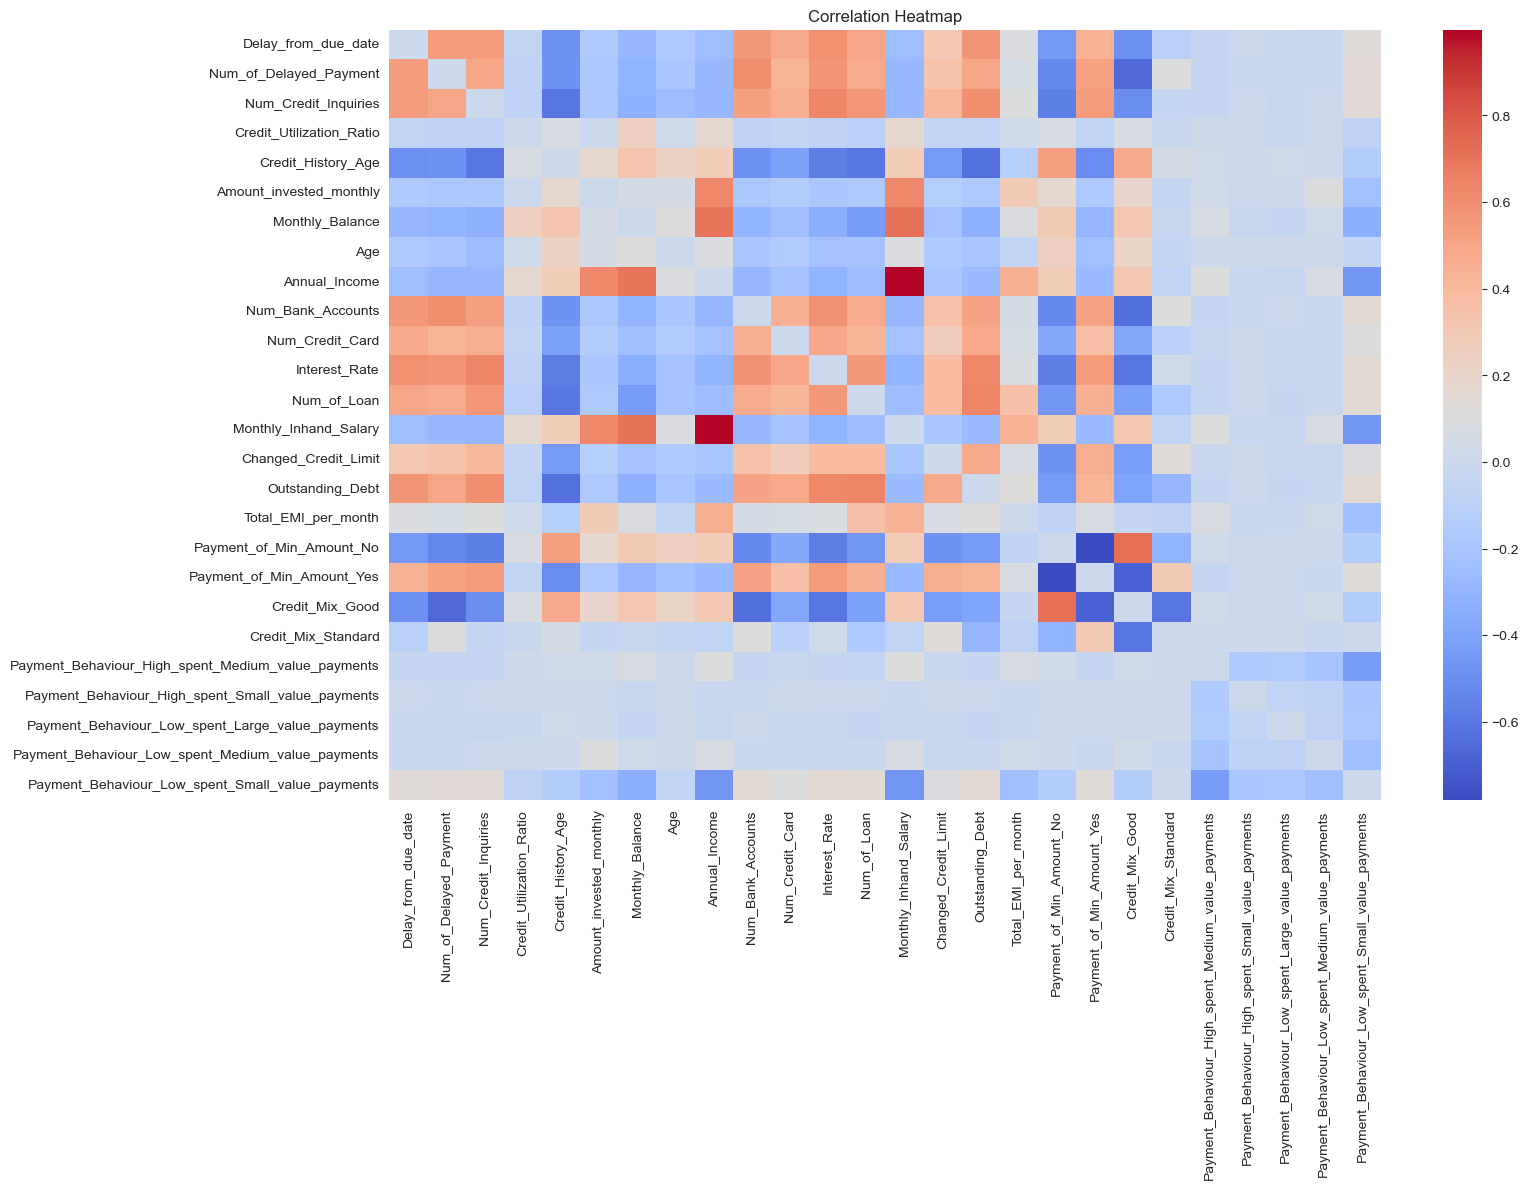

In [34]:
# Построить `сorrelation heatmap` и/или воспользоваться методом `corr()`.
corr_matrix = X_scaled.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(df_corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [35]:
# Выбрать наиболее важные признаки эвристически или на основании каких-нибудь вычислений.
np.fill_diagonal(corr_matrix.values, 0)
T_corr = 0.7
mask = (abs(corr_matrix) > T_corr)
importance = mask.sum(axis=1)
selected_features = importance[importance > 0].index.tolist()
X_filtered = X_scaled[selected_features]

In [36]:
# Осуществить многоклассовую классификацию с отфильтрованными признаками.
X_train_f, X_test_f = X_filtered.loc[X_train.index], X_filtered.loc[X_test.index]
knn.fit(X_train_f, y_train)
y_pred_f = knn.predict(X_test_f)

In [37]:
# Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
print("=== С фильтрацией признаков ===")
print("Accuracy:", accuracy_score(y_test, y_pred_f))
print("Precision:", precision_score(y_test, y_pred_f, average="weighted"))
print("Recall:", recall_score(y_test, y_pred_f, average="weighted"))
print("F1-Score:", f1_score(y_test, y_pred_f, average="weighted"))
print(classification_report(y_test, y_pred_f))

=== С фильтрацией признаков ===
Accuracy: 0.48249299719887956
Precision: 0.4797487810298483
Recall: 0.48249299719887956
F1-Score: 0.4810580266563117
              precision    recall  f1-score   support

           0       0.29      0.28      0.28      5347
           1       0.42      0.42      0.42      8696
           2       0.57      0.59      0.58     15945

    accuracy                           0.48     29988
   macro avg       0.43      0.43      0.43     29988
weighted avg       0.48      0.48      0.48     29988



**Вывод**

Фильтрация признаков привела к значительному ухудшению всех метрик:

 - Общая точность упала почти на 27%.

 - Классы 0 и 1 классифицируются плохо, особенно класс 0.

 - Класс 2 классифицируется лучше остальных, но с потерей точности.

Это говорит о том, что удалены признаки, критически важные для распознавания классов 0 и 1, и фильтрация по корреляции неподходяща для этой задачи без более тщательной настройки порогов или анализа значимости признаков.

In [38]:
# Перебрать значения гиперпараметра $k$ в каком-нибудь диапазоне с использованием кросс-валидации на данных
train_scores = []
test_scores = []
k_range = range(1, 21)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(
        knn,
        X_filtered,
        y,
        cv=5,
        scoring="accuracy",
        return_train_score=True,
        n_jobs=-1
    )
    train_scores.append(np.mean(scores['train_score']))
    test_scores.append(np.mean(scores['test_score']))

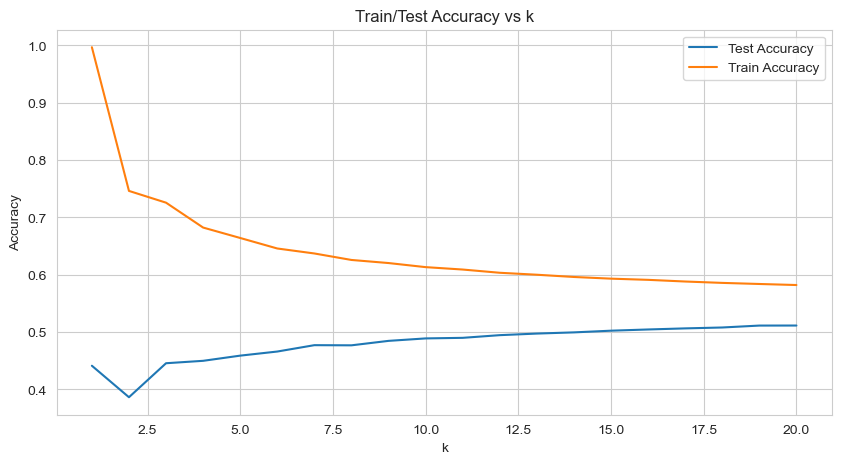

In [41]:
# Построить график *train/test accuracy* в зависимости от значения $k$.
plt.figure(figsize=(10, 5))
plt.plot(k_range, test_scores, label="Test Accuracy")
plt.plot(k_range, train_scores, label="Train Accuracy")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Train/Test Accuracy vs k")
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# Для лучшего классификатора привести метрики, `classification_report`, построить [confusion matrix]
best_k = k_range[np.argmax(test_scores)]
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_f, y_train)
y_pred_best = best_knn.predict(X_test_f)
conf_matrix = confusion_matrix(y_test, y_pred_best)

print("confusion matrix: ", conf_matrix)
print(classification_report(y_test, y_pred_best))

confusion matrix:  [[  678   662  4007]
 [  328  3158  5210]
 [  932  3204 11809]]
              precision    recall  f1-score   support

           0       0.35      0.13      0.19      5347
           1       0.45      0.36      0.40      8696
           2       0.56      0.74      0.64     15945

    accuracy                           0.52     29988
   macro avg       0.45      0.41      0.41     29988
weighted avg       0.49      0.52      0.49     29988



 **Общий вывод:**
 - Лучшие метрики достигаются до фильтрации признаков, на полном наборе данных.

 - Попытка удалить признаки по корреляции ухудшает результат, особенно на редких или «сложных» классах.

 - Следует использовать более продвинутые методы отбора признаков, либо настраивать пороги фильтрации с учётом задачи.